In [35]:
import tensorflow as tf #tensorboard için (alttaki de öyle)
import datetime
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri artırma
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [37]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nirmalsankalana/rice-leaf-disease-image")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/rice-leaf-disease-image


In [38]:
train_generator = datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 4747 images belonging to 4 classes.


In [39]:
val_generator = datagen.flow_from_directory(
    path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1185 images belonging to 4 classes.


In [40]:
# Base model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [41]:
# Katmanları dondur
for layer in base_model.layers:
    layer.trainable = False

In [42]:
# Özelleştirilmiş sınıflandırma bloğu
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)


In [43]:
# Modeli oluştur
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.fit(train_generator, validation_data=val_generator, epochs=6)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))

Epoch 1/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 92s 616ms/step - accuracy: 0.9714 - loss: 0.0835 - val_accuracy: 0.9899 - val_loss: 0.0292
Epoch 2/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 86s 576ms/step - accuracy: 0.9802 - loss: 0.0633 - val_accuracy: 0.9840 - val_loss: 0.0450
Epoch 3/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 86s 577ms/step - accuracy: 0.9813 - loss: 0.0648 - val_accuracy: 0.9975 - val_loss: 0.0087
Epoch 4/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 84s 565ms/step - accuracy: 0.9824 - loss: 0.0603 - val_accuracy: 0.9924 - val_loss: 0.0242
Epoch 5/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 86s 579ms/step - accuracy: 0.9816 - loss: 0.0642 - val_accuracy: 0.9941 - val_loss: 0.0132
Epoch 6/6
149/149 ━━━━━━━━━━━━━━━━━━━━ 87s 585ms/step - accuracy: 0.9832 - loss: 0.0537 - val_accuracy: 0.9966 - val_loss: 0.0205
              precision    recall  f1-score   support

           0     0.9968    0.9905    0.9937       316
           1     0.9931    0.9931    0.9931       288
           2     0.9938    1.0000    0.9969       320
   

In [22]:
model.fit(train_generator, validation_data=val_generator, epochs=12)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 97s 602ms/step - accuracy: 0.6964 - loss: 3.0295 - val_accuracy: 0.9266 - val_loss: 0.2114
Epoch 2/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 81s 546ms/step - accuracy: 0.8898 - loss: 0.2939 - val_accuracy: 0.9443 - val_loss: 0.1505
Epoch 3/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 548ms/step - accuracy: 0.9305 - loss: 0.1905 - val_accuracy: 0.9688 - val_loss: 0.0854
Epoch 4/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 81s 547ms/step - accuracy: 0.9285 - loss: 0.1791 - val_accuracy: 0.9485 - val_loss: 0.1337
Epoch 5/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 549ms/step - accuracy: 0.9411 - loss: 0.1635 - val_accuracy: 0.9848 - val_loss: 0.0492
Epoch 6/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 553ms/step - accuracy: 0.9505 - loss: 0.1282 - val_accuracy: 0.9781 - val_loss: 0.0629
Epoch 7/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 549ms/step - accuracy: 0.9433 - loss: 0.1578 - val_accuracy: 0.9865 - val_loss: 0.0419
Epoch 8/12
149/149 ━━━━━━━━━━━━━━━━━━━━ 86s 577ms/step - accuracy: 0.9624 - loss: 0

In [33]:
model.fit(train_generator, validation_data=val_generator, epochs=18)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/18
149/149 ━━━━━━━━━━━━━━━━━━━━ 89s 548ms/step - accuracy: 0.7342 - loss: 2.3694 - val_accuracy: 0.8987 - val_loss: 0.2652
Epoch 2/18
149/149 ━━━━━━━━━━━━━━━━━━━━ 134s 519ms/step - accuracy: 0.9055 - loss: 0.2587 - val_accuracy: 0.9494 - val_loss: 0.1328
Epoch 3/18
149/149 ━━━━━━━━━━━━━━━━━━━━ 76s 513ms/step - accuracy: 0.9177 - loss: 0.2432 - val_accuracy: 0.9646 - val_loss: 0.1158
Epoch 4/18
149/149 ━━━━━━━━━━━━━━━━━━━━ 76s 508ms/step - accuracy: 0.9354 - loss: 0.1870 - val_accuracy: 0.9536 - val_loss: 0.1171
Epoch 5/18
149/149 ━━━━━━━━━━━━━━━━━━━━ 76s 514ms/step - accuracy: 0.9389 - loss: 0.1620 - val_accuracy: 0.9688 - val_loss: 0.1007
Epoch 6/18
149/149 ━━━━━━━━━━━━━━━━━━━━ 83s 559ms/step - accuracy: 0.9560 - loss: 0.1242 - val_accuracy: 0.9671 - val_loss: 0.0953
Epoch 7/18
149/149 ━━━━━━━━━━━━━━━━━━━━ 77s 514ms/step - accuracy: 0.9449 - loss: 0.1539 - val_accuracy: 0.9705 - val_loss: 0.0912
Epoch 8/18
149/149 ━━━━━━━━━━━━━━━━━━━━ 76s 512ms/step - accuracy: 0.9453 - loss: 

In [44]:
model.fit(train_generator, validation_data=val_generator, epochs=24)
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(val_generator, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = val_generator.classes

print(classification_report(y_true_classes, y_pred_classes, digits=4))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/24
149/149 ━━━━━━━━━━━━━━━━━━━━ 100s 591ms/step - accuracy: 0.7245 - loss: 2.2939 - val_accuracy: 0.8886 - val_loss: 0.3216
Epoch 2/24
149/149 ━━━━━━━━━━━━━━━━━━━━ 83s 559ms/step - accuracy: 0.9059 - loss: 0.2636 - val_accuracy: 0.9494 - val_loss: 0.1336
Epoch 3/24
149/149 ━━━━━━━━━━━━━━━━━━━━ 82s 553ms/step - accuracy: 0.9218 - loss: 0.2129 - val_accuracy: 0.9494 - val_loss: 0.1339
Epoch 4/24
149/149 ━━━━━━━━━━━━━━━━━━━━ 87s 584ms/step - accuracy: 0.9292 - loss: 0.2115 - val_accuracy: 0.9705 - val_loss: 0.0806
Epoch 5/24
149/149 ━━━━━━━━━━━━━━━━━━━━ 84s 563ms/step - accuracy: 0.9436 - loss: 0.1538 - val_accuracy: 0.9603 - val_loss: 0.1204
Epoch 6/24
149/149 ━━━━━━━━━━━━━━━━━━━━ 83s 556ms/step - accuracy: 0.9547 - loss: 0.1437 - val_accuracy: 0.9840 - val_loss: 0.0459
Epoch 7/24
149/149 ━━━━━━━━━━━━━━━━━━━━ 84s 563ms/step - accuracy: 0.9581 - loss: 0.1149 - val_accuracy: 0.9713 - val_loss: 0.0922
Epoch 8/24
149/149 ━━━━━━━━━━━━━━━━━━━━ 85s 568ms/step - accuracy: 0.9470 - loss: 

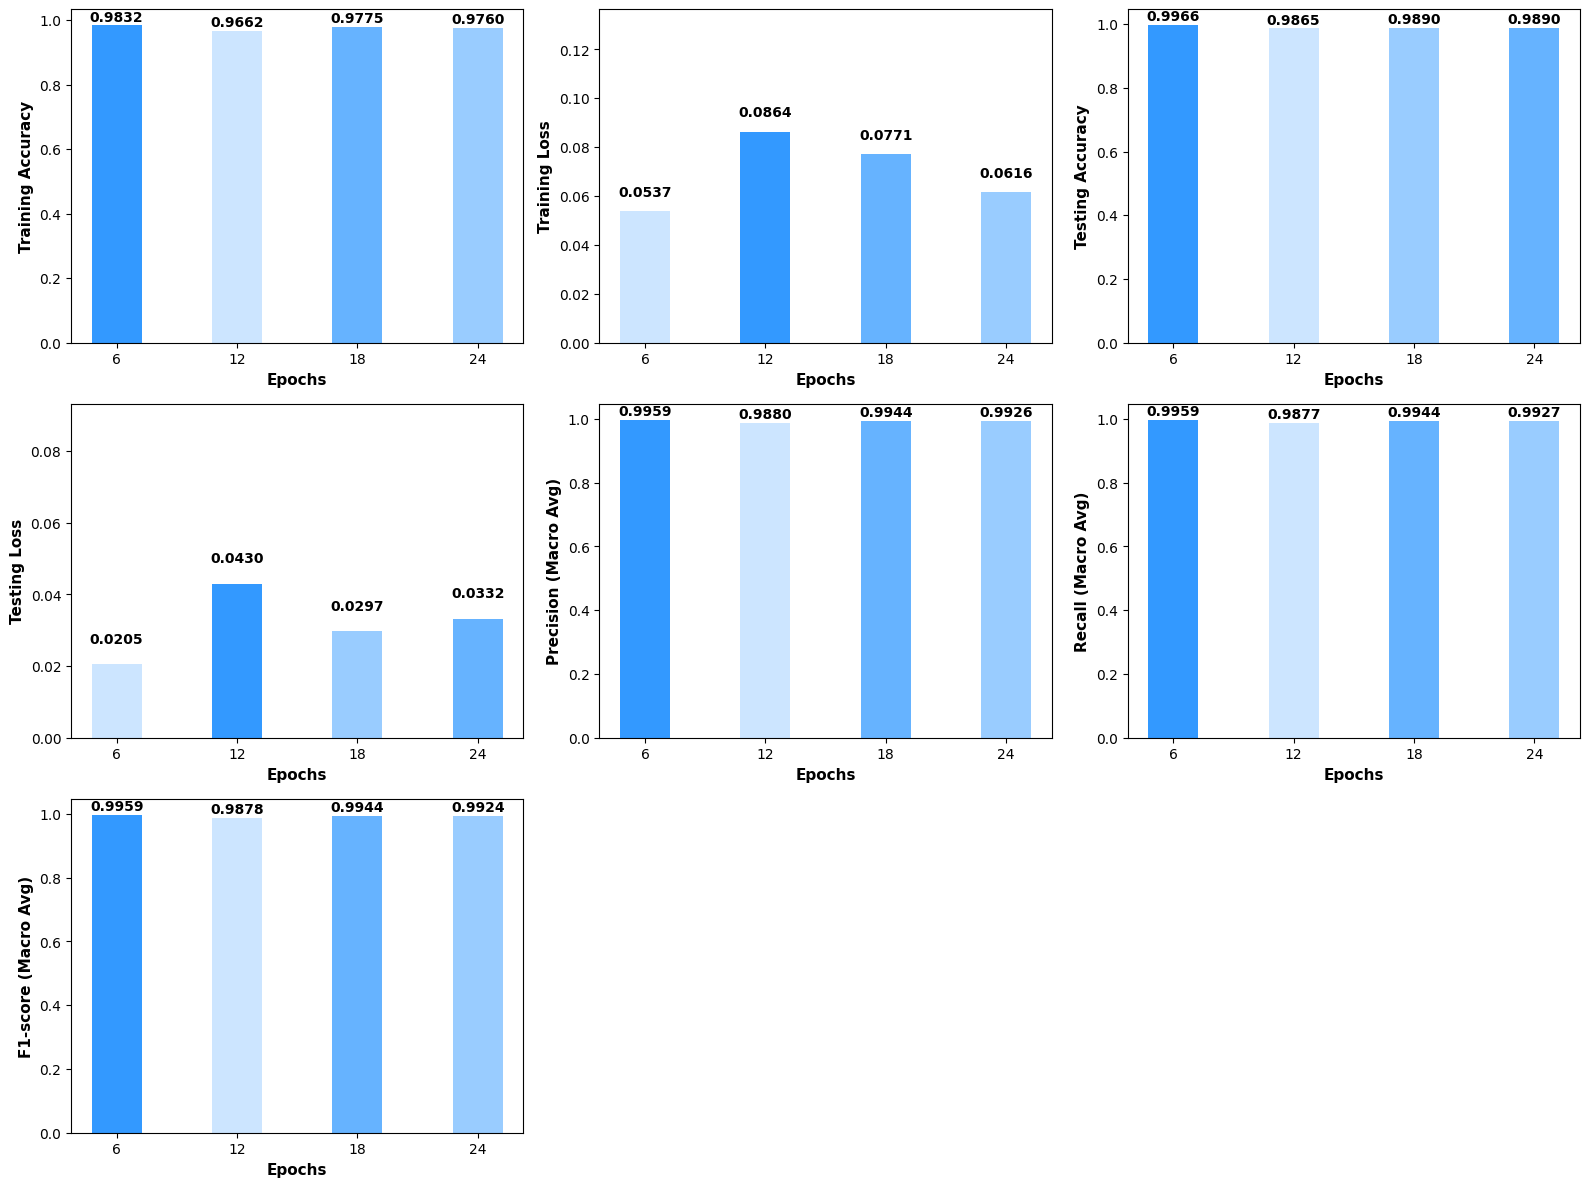

In [46]:
import matplotlib.pyplot as plt
import numpy as np

epochs = [6, 12, 18, 24]
train_accuracy = [0.9832, 0.9662, 0.9775, 0.9760]
train_loss = [0.0537, 0.0864, 0.0771, 0.0616]
test_accuracy = [0.9966, 0.9865, 0.9890, 0.9890]
test_loss = [0.0205, 0.0430, 0.0297, 0.0332]
precision_macro = [0.9959, 0.9880, 0.9944, 0.9926]
recall_macro = [0.9959, 0.9877, 0.9944, 0.9927]
f1_macro = [0.9959, 0.9878, 0.9944, 0.9924]

colors = ['#cce5ff', '#99ccff', '#66b3ff', '#3399ff', '#007acc']
metrics = [
    ("Training Accuracy", train_accuracy),
    ("Training Loss", train_loss),
    ("Testing Accuracy", test_accuracy),
    ("Testing Loss", test_loss),
    ("Precision (Macro Avg)", precision_macro),
    ("Recall (Macro Avg)", recall_macro),
    ("F1-score (Macro Avg)", f1_macro),
]

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 12))
axs = axs.flatten()

for i, (title, values) in enumerate(metrics):
    sorted_indices = np.argsort(values)
    sorted_values = np.array(values)[sorted_indices]
    sorted_epochs = np.array(epochs)[sorted_indices]
    sorted_colors = [colors[j] for j in np.argsort(sorted_values)]


    bars = axs[i].bar(sorted_epochs, sorted_values, color=sorted_colors, width=2.5)
    #axs[i].set_title(title, fontsize=13, fontweight='bold')
    axs[i].set_xlabel("Epochs", fontsize=11, fontweight='bold')
    axs[i].set_ylabel(title, fontsize=11, fontweight='bold')
    axs[i].set_ylim(0, max(values) + 0.05)
    axs[i].set_xticks(epochs)

    for bar in bars:
        height = bar.get_height()
        axs[i].text(bar.get_x() + bar.get_width()/2.0, height + 0.005,
                    f'{height:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for j in range(len(metrics), len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()